# Notebook Title - Logistic Regression Training and Inference from Scratch

In this notebook we will perform logistic regression training and inference from scratch.

For this notebook we will use a preprocessed version of Penguins Dataset stored at data/penguins_preprocessed.csv.

For more details on dataset cleaning refer to notebook - csv-dataset-cleaning-and-eda.ipynb

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
penguins = pd.read_csv('data/penguins_preprocessed.csv')

In [3]:
penguins.shape

(311, 7)

In [4]:
penguins.head(20)

,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender_female,gender_male
0,0.571429,0.254545,0.666667,0.152542,0.291667,0,1
1,1.000000,0.269091,0.511905,0.237288,0.305556,1,0
2,0.571429,0.298182,0.583333,0.389831,0.152778,1,0
3,0.142857,0.167273,0.738095,0.355932,0.208333,1,0
4,0.857143,0.261818,0.892857,0.305085,0.263889,0,1
5,0.571429,0.247273,0.559524,0.152542,0.256944,1,0
6,0.285714,0.258182,0.773810,0.389831,0.548611,0,1
7,0.714286,0.327273,0.535714,0.169492,0.138889,1,0
8,0.428571,0.236364,0.964286,0.322034,0.305556,0,1
9,0.285714,0.090909,0.952381,0.440678,0.472222,0,1


In [5]:
penguins['gender'] = penguins['gender_female'].map(lambda x: 'female' if x else 'male')

In [6]:
penguins.drop(columns=['gender_female','gender_male'], inplace = True)

In [7]:
penguins.head(20)

,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender
0,0.571429,0.254545,0.666667,0.152542,0.291667,male
1,1.000000,0.269091,0.511905,0.237288,0.305556,female
2,0.571429,0.298182,0.583333,0.389831,0.152778,female
3,0.142857,0.167273,0.738095,0.355932,0.208333,female
4,0.857143,0.261818,0.892857,0.305085,0.263889,male
5,0.571429,0.247273,0.559524,0.152542,0.256944,female
6,0.285714,0.258182,0.773810,0.389831,0.548611,male
7,0.714286,0.327273,0.535714,0.169492,0.138889,female
8,0.428571,0.236364,0.964286,0.322034,0.305556,male
9,0.285714,0.090909,0.952381,0.440678,0.472222,male


In [12]:
penguins_train = penguins.sample(frac = 0.8)
penguins_test = penguins.drop(index = penguins_train.index)

In [13]:
y_train = penguins_train['gender']
y_test = penguins_test['gender']

In [14]:
x_train = penguins_train.drop(columns = ['gender'])
x_test = penguins_test.drop(columns = ['gender'])

In [15]:
print("X_train dimensions : {0} and Y_train dimensions : {1}".format(x_train.shape,y_train.shape))
print("X_test dimensions : {0} and Y_test dimensions : {1}".format(x_test.shape,y_test.shape))

X_train dimensions : (249, 5) and Y_train dimensions : (249,)
X_test dimensions : (62, 5) and Y_test dimensions : (62,)


In [16]:
class LogitRegression():
    def __init__(self,lr,iter):
        self.lr=lr
        self.iter=iter
        self.N=0
        self.W=0
        self.loss=[]

    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def cost(self,x,y,w):
        h=self.sigmoid(np.dot(x,w))
        J=np.sum((-y*np.log(h)-(1-y)*np.log(1-h))*(1/self.N))
        return J
    
    def gradient_descent(self,w,x,y):
        pred=self.sigmoid(np.dot(x,w))
        delta=pred-y
        dW=np.sum(x.T*delta)/self.N
        return dW
        # print("Weight is:",w)
        #return w
    
    def fit(self,x_train,y_train):
        y_map={'female':1,'male':0}
        self.N=x_train.shape[0]
        bias=np.ones((x_train.shape[0],1))
        x_train=np.concatenate((bias,x_train),axis=1)
        y_train=y_train.map(y_map).to_numpy()
        self.W=np.random.uniform(low=0,high=1,size=x_train.shape[1]-1)
        self.W=np.insert(self.W,0,1)
        print("Initial weights:",self.W)
        for i in range(self.iter):
            self.loss.append(self.cost(x_train,y_train,self.W))
            dW=self.gradient_descent(self.W,x_train,y_train)
            self.W=self.W-self.lr*(dW)
        print("Final fitted weights:{0}".format(self.W))
    
    def predict(self,X):
        gender_map={1:'female',0:'male'}
        bias=np.ones((X.shape[0],1))
        X=np.concatenate((bias,X),axis=1)
        h=self.sigmoid(np.dot(X,self.W))
        prediction=[] 
        for i in range(h.shape[0]):
            if(h[i]>=0.5):
                prediction.append('female')
            else:
                prediction.append('male')
        return prediction
        


In [17]:
def accuracy(y_pred,y_test):
    y_test=y_test.to_numpy()
    correct_pred=0
    for i in range(len(y_pred)):
        if(y_pred[i]==y_test[i]):
            correct_pred+=1
    return (correct_pred/len(y_test))*100


In [71]:
#1st setup lr=10^-4 irerations=100000
model1=LogitRegression(lr=0.0001,iter=100000)
model1.fit(x_train,y_train)
acc=accuracy(model1.predict(x_test),y_test)
print("Accuracy obtained is:{0}%".format(acc))
print("loss obtained is:",model1.loss)

Initial weights: [1.         0.47256921 0.78279362 0.97875152 0.34038843 0.00469825]
Final fitted weights:[ 0.26713993 -0.26029086  0.04993355  0.24589145 -0.39247164 -0.72816182]
Accuracy obtained is:62.903225806451616%
loss obtained is: [1.3280379745262416, 1.3277981133184573, 1.3275582982778869, 1.3273185294155623, 1.3270788067425108, 1.3268391302697549, 1.3265995000083113, 1.3263599159691926, 1.3261203781634063, 1.325880886601955, 1.3256414412958357, 1.3254020422560413, 1.3251626894935593, 1.3249233830193718, 1.3246841228444572, 1.3244449089797876, 1.3242057414363306, 1.3239666202250489, 1.3237275453569, 1.3234885168428365, 1.323249534693806, 1.323010598920751, 1.322771709534609, 1.322532866546312, 1.322294069966788, 1.322055319806959, 1.321816616077742, 1.3215779587900498, 1.3213393479547888, 1.3211007835828614, 1.3208622656851645, 1.3206237942725896, 1.3203853693560237, 1.320146990946348, 1.3199086590544393, 1.3196703736911686, 1.319432134867402, 1.3191939425940014, 1.31895579688

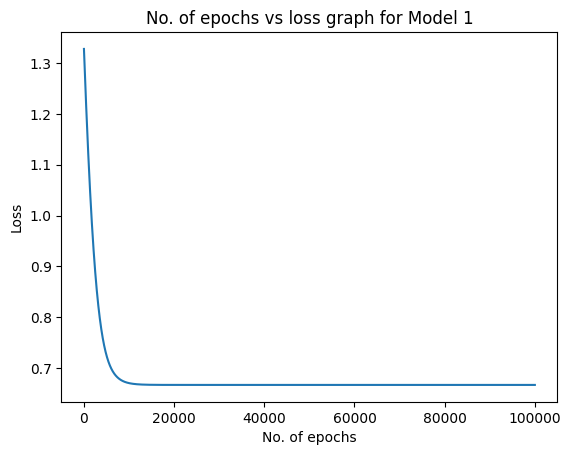

In [72]:
x=range(model1.iter)
plt.plot(x,model1.loss)
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.title('No. of epochs vs loss graph for Model 1')
plt.show()

In [86]:
#2nd Setup lr=10^-3 iterations=1000
model2=LogitRegression(lr=0.001,iter=1000)
model2.fit(x_train,y_train)
acc=accuracy(model2.predict(x_test),y_test)
print("Accuracy obtained is:{0}%".format(acc))
print("loss obtained is:",model2.loss)

Initial weights: [1.         0.80053898 0.19468512 0.2248832  0.19550391 0.11127228]
Final fitted weights:[ 0.44884234  0.24938132 -0.35647254 -0.32627446 -0.35565375 -0.43988537]
Accuracy obtained is:72.58064516129032%
loss obtained is: [1.0924630998844564, 1.0905666125675146, 1.088675423173913, 1.0867895347670817, 1.0849089503110885, 1.0830336726703849, 1.0811637046095603, 1.0792990487931027, 1.0774397077851676, 1.0755856840493543, 1.0737369799484904, 1.071893597744423, 1.07005553959782, 1.0682228075679752, 1.0663954036126246, 1.0645733295877715, 1.062756587247514, 1.0609451782438866, 1.0591391041267069, 1.05733836634343, 1.0555429662390106, 1.0537529050557768, 1.0519681839333068, 1.0501888039083174, 1.0484147659145584, 1.0466460707827174, 1.0448827192403307, 1.0431247119117033, 1.0413720493178373, 1.0396247318763676, 1.0378827599015072, 1.0361461336039994, 1.034414853091079, 1.0326889183664423, 1.030968329330223, 1.0292530857789797, 1.0275431874056897, 1.0258386337997507, 1.02413942

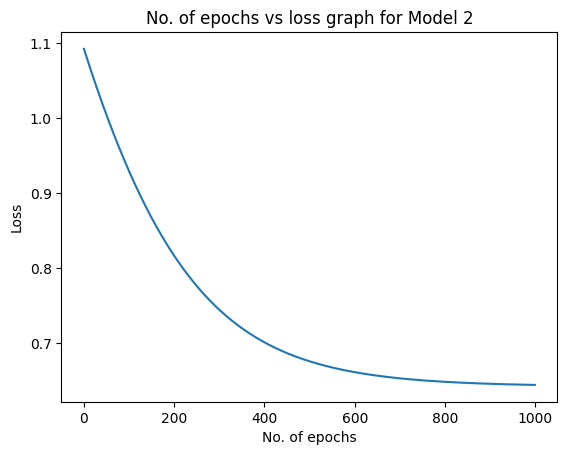

In [87]:
x=range(model2.iter)
plt.plot(x,model2.loss)
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.title('No. of epochs vs loss graph for Model 2')
plt.show()

In [100]:
#3rd Setup lr=10^-3 iterations=10000
model3=LogitRegression(lr=0.001,iter=10000)
model3.fit(x_train,y_train)
acc=accuracy(model3.predict(x_test),y_test)
print("Accuracy obtained is:{0}%".format(acc))
print("loss obtained is:",model3.loss)


Initial weights: [1.         0.4349741  0.90204294 0.53445324 0.35141292 0.23212602]
Final fitted weights:[ 0.28971445 -0.27531145  0.19175739 -0.17583231 -0.35887263 -0.47815953]
Accuracy obtained is:54.83870967741935%
loss obtained is: [1.2904489541091457, 1.288118626263087, 1.2857930239774569, 1.2834721573596208, 1.2811560364601153, 1.2788446712719876, 1.2765380717301362, 1.2742362477106535, 1.271939209030167, 1.2696469654451856, 1.2673595266514446, 1.2650769022832526, 1.2627991019128408, 1.2605261350497134, 1.2582580111400001, 1.2559947395658104, 1.253736329644589, 1.251482790628474, 1.249234131703658, 1.2469903619897496, 1.2447514905391377, 1.2425175263363606, 1.2402884782974724, 1.2380643552694177, 1.2358451660294043, 1.2336309192842818, 1.2314216236699211, 1.2292172877505976, 1.227017920018377, 1.224823528892505, 1.222634122718798, 1.2204497097690408, 1.2182702982403826, 1.2160958962547412, 1.213926511858209, 1.2117621530204596, 1.2096028276341637, 1.207448543514404, 1.205299308

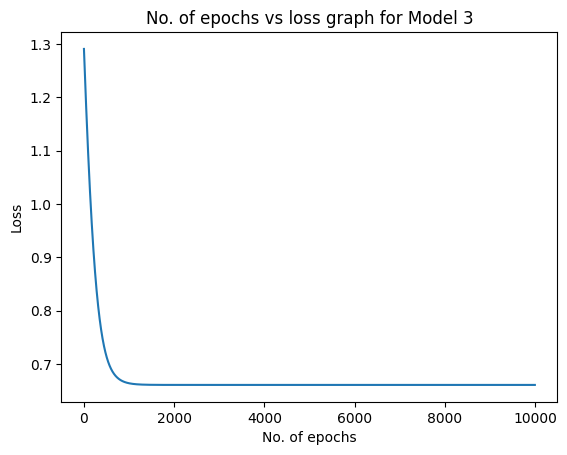

In [102]:
x=range(model3.iter)
plt.plot(x,model3.loss)
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.title('No. of epochs vs loss graph for Model 3')
plt.show()

#### References
1) https://docs.python.org/3/index.html
2) https://matplotlib.org/stable/
3) https://seaborn.pydata.org/api.html
4) https://pandas.pydata.org/docs/reference/index.html
5) https://numpy.org/doc/stable/index.html